In [1]:
#from leecarter import leecarter # nie ma tego?
import pandas as pd
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt

In [2]:
mortality = pd.read_csv('death_rates2.txt',delim_whitespace=True) 
mortality = mortality[mortality['Age'] != '110+']
mortality['Age'] = mortality['Age'].astype(int)
mortality['Year'] = mortality['Year'].astype(int)
mortality = mortality[mortality['Age'] <= 100]
mortality['Female_l'] = np.log(mortality['Female'].astype(float))
mortality['Male_l'] = np.log(mortality['Male'].astype(float))
mortality['Total_l'] = np.log(mortality['Total'].astype(float))
mortality = mortality[['Year', 'Age', 'Female_l', 'Male_l', 'Total_l']]
mortality

,Year,Age,Female_l,Male_l,Total_l
0,1958,0,-2.723920,-2.480397,-2.591788
1,1958,1,-5.352562,-5.291540,-5.320972
2,1958,2,-6.357324,-6.197751,-6.272237
3,1958,3,-6.732962,-6.527266,-6.622576
4,1958,4,-7.066751,-6.837297,-6.943382
5,1958,5,-7.253066,-6.966444,-7.096497
6,1958,6,-7.420249,-7.070274,-7.226584
7,1958,7,-7.523941,-7.146012,-7.314221
8,1958,8,-7.747085,-7.275925,-7.480456
9,1958,9,-7.883265,-7.311222,-7.552112


In [3]:
# train test split

In [4]:
fm = mortality.pivot(index="Age", columns="Year", values='Female_l')
fm_train = fm.iloc[:,0:round(np.shape(fm)[1]*2/3)]
fm_cross_val = fm.iloc[:,round(np.shape(fm)[1]*2/3):]
data = fm_cross_val.values.tolist()

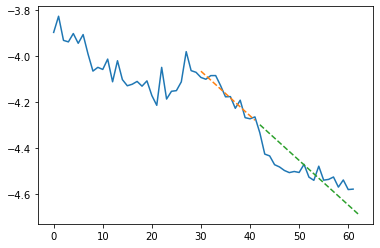

In [5]:
data = fm.values # (101 (age), 62 (years))

total_years = data.shape[1]

trained_from = 30
trained_to = 41
trained_data = data[:,trained_from:trained_to+1]
trained_time = np.arange(trained_from, trained_to + 1)


b1 = ((trained_time[None,:] - trained_time.mean())*(trained_data-trained_data.mean(1)[:,None])).sum(1)/((trained_time - trained_time.mean())**2).sum()
b0 = trained_data.mean(1)-b1*trained_time.mean()

b1 = b1[:, None] 
b0 = b0[:, None]


estimated_time = np.arange(trained_to + 1, total_years + 1)
estimated_data = b1*estimated_time[None,:] + b0

adjusted_trend = b1*trained_time[None,:] + b0


age = 65
plt.plot(data[age, :])
plt.plot(trained_time, adjusted_trend[age, :], '--')
plt.plot(estimated_time, estimated_data[age, :], '--')
plt.show()

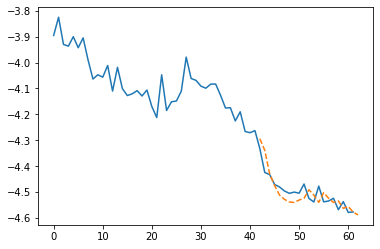

In [6]:
# rolling window

data = fm.values # (101 (age), 62 (years))

W_lengths = [3, 4, 5, 6, 7, 8, 10]

total_years = data.shape[1]
estimated_from = 42
lag = 1

estimated_data_different_windows = []
for window_size in W_lengths:
    
    estimated_data = []
    
    for i in range(total_years - estimated_from + 1):
        trained_to = estimated_from + i 
        trained_from = trained_to - window_size 
        trained_data = data[:,trained_from:trained_to]
        trained_time = np.arange(trained_from, trained_to)

        b1 = ((trained_time[None,:] - trained_time.mean())*(trained_data-trained_data.mean(1)[:,None])).sum(1)/((trained_time - trained_time.mean())**2).sum()
        b0 = trained_data.mean(1)-b1*trained_time.mean()
        #b1 = b1[:, None] 
        #b0 = b0[:, None]

        estimated_data.append(trained_to*b1 + b0)

    estimated_data = np.array(estimated_data).T
    estimated_data_different_windows.append(estimated_data)
    
estimated_data_different_windows = np.array(estimated_data_different_windows) # shape (7 (windows number), 101 (age), 23 (years))


estimated_data = estimated_data_different_windows.mean(0)
estimated_time = np.arange(estimated_from, total_years + 1)
    
plt.plot(data[age, :])
plt.plot(estimated_time, estimated_data[age, :], '--')
plt.show()

In [7]:
est = []
err = []
for i in range(len(data)):
    t = np.linspace(0, 20, 21)
    b1, b0 = np.polyfit(t[:10], data[i][:10], 1)
    temp = t*b1 + b0
    est.append(temp)
    err.append(data[i] - temp)

ValueError: operands could not be broadcast together with shapes (62,) (21,) 

In [ ]:
np.sum(abs(err))/len(err)

In [ ]:
mean_err = []
for i in err:
    mean_err.append(np.sum(abs(i))/len(i))

In [ ]:
plt.plot(err)
plt.plot(t, np.zeros(21), 'r--', )

In [8]:
plt.plot(mean_err)

NameError: name 'mean_err' is not defined

In [9]:
def iksde(dataframe, wiek):
    data = dataframe.values.tolist()
    t = np.linspace(0, len(data[wiek]), len(data[wiek]))
    b1, b0 = np.polyfit(t, data[wiek], 1)
    est = t*b1 + b0
    err = data[wiek] - est
    return np.exp(np.arange(len(data[wiek])+1, len(data[wiek])+20, 1)*b1 + b0)

In [10]:
iksde(fm_train, 65)

array([0.01466367, 0.01456637, 0.01446971, 0.01437369, 0.01427831,
       0.01418356, 0.01408944, 0.01399595, 0.01390308, 0.01381082,
       0.01371917, 0.01362814, 0.0135377 , 0.01344787, 0.01335863,
       0.01326999, 0.01318193, 0.01309446, 0.01300757])